# Neural Network class definition

In [1]:
import numpy as np
from scipy.special import expit, logit
import matplotlib.pyplot as plt
from random import randint
import cv2


class NeuralNetwork:

    """ Initialized Nerual Network """
    def __init__(self, input_nodes, hidden_nodes, output_nodes, learning_rate):

        # Set number of nodes per layer
        self.input_nodes = input_nodes
        self.hidden_nodes = hidden_nodes
        self.output_nodes = output_nodes

        # Set learning rate
        self.learning_rate = learning_rate

        # Generate normal weights randomly
        self.w_i_to_h = np.random.default_rng().normal(0, pow(self.input_nodes, -0.5), (self.hidden_nodes, self.input_nodes))
        self.w_h_to_o = np.random.default_rng().normal(0, pow(self.hidden_nodes, -0.5), (self.output_nodes, self.hidden_nodes))

        # Activation function based on sigmoid
        self.activation_function = lambda x : expit(x)
        self.inverse_activation_function = lambda x : logit(x)


    """ Neural network learning based on an input/output sample """
    def train(self, input_list, target_list):

        # Calculate the output of the neural network given the input
        inputs = np.array(input_list, ndmin=2).T
        x_hidden = np.dot(self.w_i_to_h, inputs)
        o_hidden = self.activation_function(x_hidden)
        x_output = np.dot(self.w_h_to_o, o_hidden)
        o_output = self.activation_function(x_output)

        # Calculating the error of the neural network based on the difference between the output and the targets
        targets = np.array(target_list, ndmin=2).T
        output_errors = targets - o_output

        # Then propagation of the network error on the neurons of the hidden layer
        hidden_errors = np.dot(self.w_h_to_o.T, output_errors)

        # Calculation of new weights of connections with decreasing gradient
        self.w_h_to_o += self.learning_rate * np.dot((output_errors * o_output * (1-o_output)), o_hidden.T)
        self.w_i_to_h += self.learning_rate * np.dot((hidden_errors * o_hidden * (1-o_hidden)), inputs.T)


    """ Calculate the output of the neural network given the input """
    def query(self, input_list):
        # Convert the list of input values to a two-dimensional array
        inputs = np.array(input_list, ndmin=2).T

        # Calculation of the input signal and then the output of the hidden layer
        x_hidden = np.dot(self.w_i_to_h, inputs)
        o_hidden = self.activation_function(x_hidden)

        # Calculation of the input signal and then the output of the output layer
        x_output = np.dot(self.w_h_to_o, o_hidden)
        o_output = self.activation_function(x_output)

        return o_output


    """ Calculate the input of the neural network given the output """
    def reversequery(self, targets_list):
        o_output = np.array(targets_list, ndmin=2).T
        x_output = self.inverse_activation_function(o_output)
        o_hidden = np.dot(self.w_h_to_o.T, x_output)
        o_hidden -= np.min(o_hidden)
        o_hidden /= np.max(o_hidden)
        o_hidden *= 0.98
        o_hidden += 0.01

        x_hidden = self.inverse_activation_function(o_hidden)
        inputs = np.dot(self.w_i_to_h.T, x_hidden)

        inputs -= np.min(o_hidden)
        inputs /= np.max(o_hidden)
        inputs *= 0.98
        inputs += 0.01

        return inputs


# Neural Network training and testing with MNIST

## Load dataset

### Train data

In [ ]:
train_file = open("./data/mnist_train.csv", 'r')
train_list = train_file.readlines()
train_file.close()

### Test data

In [ ]:
test_file = open("./data/mnist_test.csv", 'r')
test_list = test_file.readlines()
test_file.close()

## Nerual Network instance creation

In [ ]:
input_nodes = 784
hidden_nodes = 200
output_nodes = 10

learning_rate = 0.1

nn = NeuralNetwork(input_nodes, hidden_nodes, output_nodes, learning_rate)

## Nerual Network train

In [ ]:
epochs = 4
for e in range(epochs):
    for row in train_list:
        row_data = row.split(',')
        inputs = (np.asfarray(row_data[1:]) / (255.0 * 0.99)) + 0.01
        targets = np.zeros(nn.output_nodes) + 0.01
        targets[int(row_data[0])] = 0.99
        nn.train(inputs, targets)

## Nerual Network test

In [ ]:
score_card = []
for row in test_list:
    row_data = row.split(',')
    target_number = int(row_data[0])
    inputs = (np.asfarray(row_data[1:]) / 255 * 0.98) + 0.01
    outputs = nn.query(inputs)
    predicted_number = np.argmax(outputs)
    if(target_number == predicted_number):
        score_card.append(1)
    else:
        score_card.append(0)

score_card_array = np.asarray(score_card)
print("\nNet Performance: ", score_card_array.sum() / score_card_array.size)



Net Performance:  0.9721


# Show result

Target number is:  4
Neural network selection: 4

0 -> 0.00
1 -> 0.00
2 -> 0.01
3 -> 0.00
4 -> 0.99
5 -> 0.00
6 -> 0.00
7 -> 0.01
8 -> 0.00
9 -> 0.00


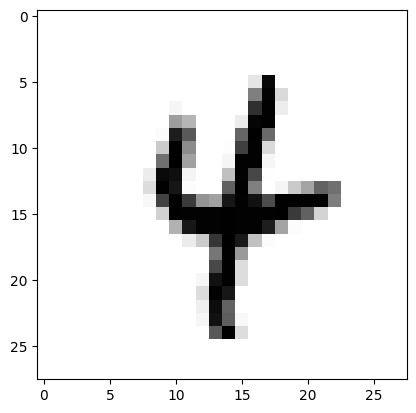

In [ ]:
number_data = test_list[randint(0, len(test_list))].split(',')

print("Target number is: ", number_data[0])
image_data = np.asfarray(number_data[1:]).reshape((28,28))
image = plt.imshow(image_data, cmap='Greys')

result = nn.query((np.asfarray(number_data[1:]) / (255.0 * 0.98)) + 0.01)
print(f"Neural network selection: {np.argmax(result)}")

print()
for i in range(nn.output_nodes):
    print(f"{i} -> {str(result[i][0])[:4]}")

# Predicting Your Own Images Using the Neural Network

Neural network selection: 2

0 -> 0.00
1 -> 0.01
2 -> 0.58
3 -> 0.02
4 -> 0.02
5 -> 0.00
6 -> 9.27
7 -> 0.06
8 -> 2.26
9 -> 0.00


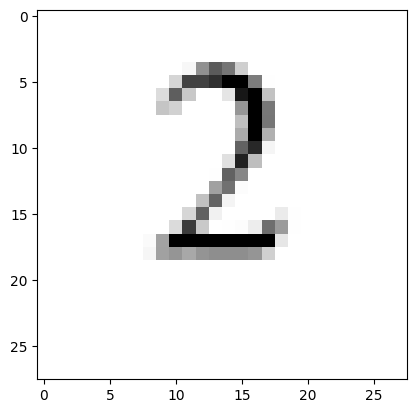

In [ ]:
image = cv2.imread('./data/2.png', cv2.IMREAD_GRAYSCALE)
img_data  = 255.0 - image.reshape(784)
img_data = (img_data / 255.0 * 0.99) + 0.01
plt.imshow(img_data.reshape(28,28), cmap='Greys', interpolation='None')

result = nn.query(img_data)
print(f"Neural network selection: {np.argmax(result)}")

print()
for i in range(nn.output_nodes):
    print(f"{i} -> {str(result[i][0])[:4]}")

# Black Box of the Neural Network

### number 0

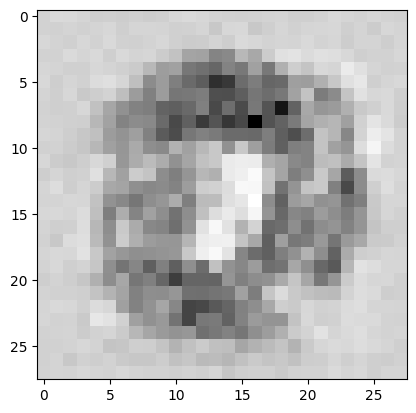

In [ ]:
targets_list = np.zeros(output_nodes) + 0.01
targets_list[0] = 0.99
image_array = nn.reversequery(targets_list)
plt.imshow(image_array.reshape((28,28)), cmap='Greys')
print()

### number 1

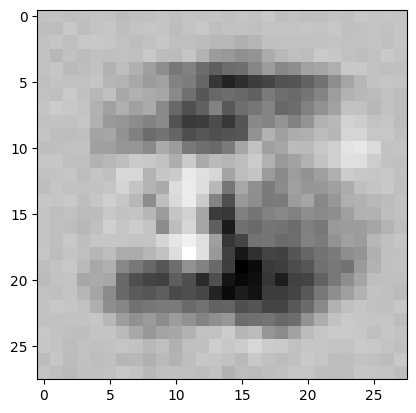

In [ ]:
targets_list = np.zeros(output_nodes) + 0.01
targets_list[1] = 0.99
image_array = nn.reversequery(targets_list)
plt.imshow(image_array.reshape((28,28)), cmap='Greys')
print()

### number 2

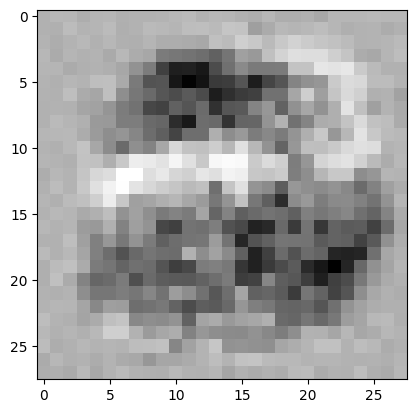

In [ ]:
targets_list = np.zeros(output_nodes) + 0.01
targets_list[2] = 0.99
image_array = nn.reversequery(targets_list)
plt.imshow(image_array.reshape((28,28)), cmap='Greys')
print()

### number 3

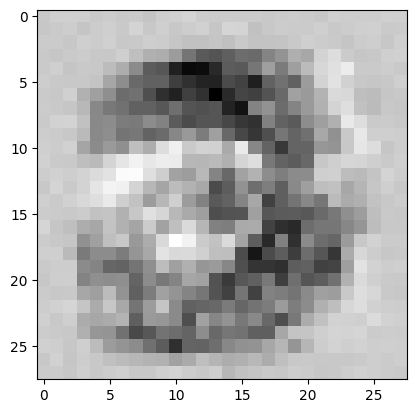

In [ ]:
targets_list = np.zeros(output_nodes) + 0.01
targets_list[3] = 0.99
image_array = nn.reversequery(targets_list)
plt.imshow(image_array.reshape((28,28)), cmap='Greys')
print()

### number 4

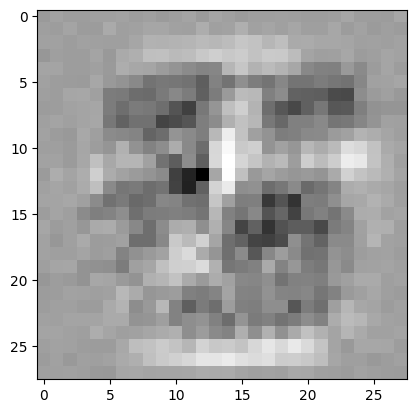

In [ ]:
targets_list = np.zeros(output_nodes) + 0.01
targets_list[4] = 0.99
image_array = nn.reversequery(targets_list)
plt.imshow(image_array.reshape((28,28)), cmap='Greys')
print()

### number 5

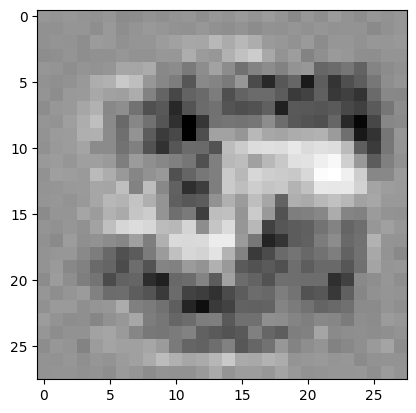

In [ ]:
targets_list = np.zeros(output_nodes) + 0.01
targets_list[5] = 0.99
image_array = nn.reversequery(targets_list)
plt.imshow(image_array.reshape((28,28)), cmap='Greys')
print()

### number 6

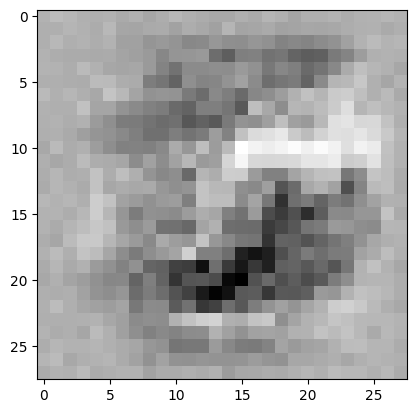

In [ ]:
targets_list = np.zeros(output_nodes) + 0.01
targets_list[6] = 0.99
image_array = nn.reversequery(targets_list)
plt.imshow(image_array.reshape((28,28)), cmap='Greys')
print()

### number 7

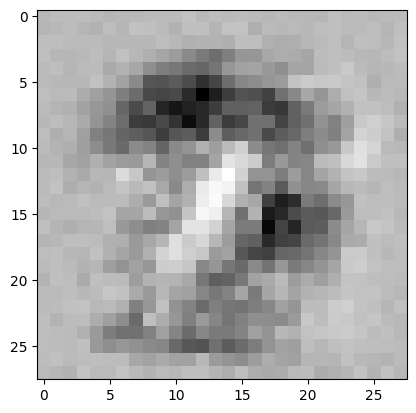

In [ ]:
targets_list = np.zeros(output_nodes) + 0.01
targets_list[7] = 0.99
image_array = nn.reversequery(targets_list)
plt.imshow(image_array.reshape((28,28)), cmap='Greys')
print()

### number 8

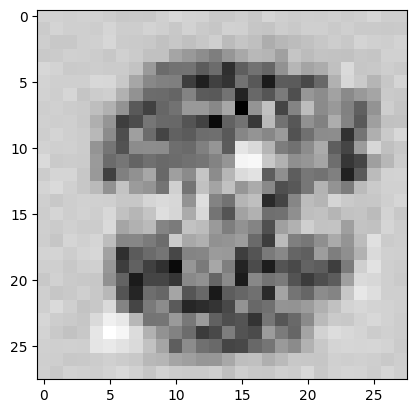

In [ ]:
targets_list = np.zeros(output_nodes) + 0.01
targets_list[8] = 0.99
image_array = nn.reversequery(targets_list)
plt.imshow(image_array.reshape((28,28)), cmap='Greys')
print()

### number 9

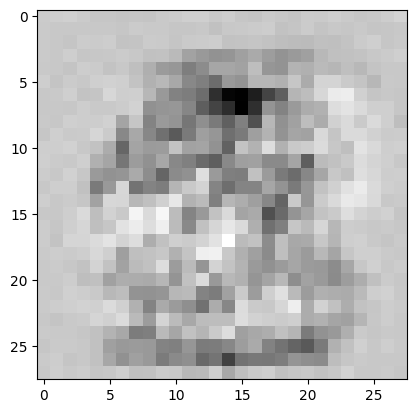

In [ ]:
targets_list = np.zeros(output_nodes) + 0.01
targets_list[9] = 0.99
image_array = nn.reversequery(targets_list)
plt.imshow(image_array.reshape((28,28)), cmap='Greys')
print()